<a href="https://colab.research.google.com/github/vaishnav90/loanapproval/blob/main/LoanApprovalColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comprehensive Loan Approval Fairness Analysis Tutorial
**Learning Objectives**

By the end of this notebook, you will understand:

* How to build a complete machine learning pipeline

*   Different classification algorithms and their applications

*   How to handle imbalanced datasets

*   Fairness analysis in machine learning

*   Data visualization techniques

*   Model evaluation metrics



#Introduction
**What is this project about?**

This project analyzes loan approval decisions using machine learning while checking for fairness across different demographic groups. It's crucial in finance to ensure algorithms don't discriminate against certain groups.
Key Concepts You'll Learn:



*   Classification: Predicting categories (Approved/Rejected)
*   Fairness in ML: Ensuring equal treatment across groups
* Feature Engineering: Preparing data for machine learning
* Model Comparison: Testing multiple algorithms
* Bias Detection: Finding unfair patterns in predictions



#**Introduction and Setup**


First, let's install and import all necessary libraries

In [ ]:
!pip install imbalanced-learn scikit-learn pandas numpy matplotlib seaborn scipy

In [ ]:
import pandas as pd  # for data manipulation
import numpy as np  # for numerical operations
import matplotlib.pyplot as plt  # for data visualization
import seaborn as sns  # for prettier plots
from scipy import stats  # for statistical functions

What each library does:

* pandas: Think of it as Python's version of Excel - great for data tables
* numpy: Handles mathematical operations on large arrays of numbers
* matplotlib: Creates basic plots (line charts, bar charts, etc.)
* seaborn: Makes matplotlib plots look prettier and adds statistical features

Scikit-learn imports for model training, preprocessing, and evaluation

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score  # splitting data and tuning
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder  # feature scaling and encoding
from sklearn.impute import SimpleImputer  # to fill in missing values
from sklearn.compose import ColumnTransformer  # to apply preprocessing to specific columns
from sklearn.pipeline import Pipeline  # to create ML workflows

Let's understand each sklearn import:

* train_test_split: Splits data into training and testing sets
* GridSearchCV: Automatically tests different parameter combinations
* cross_val_score: Tests model performance using cross-validation
* StandardScaler: Makes all numerical features have similar scales
* OneHotEncoder: Converts categorical data to numbers
* LabelEncoder: Converts target labels to numbers
* SimpleImputer: Fills in missing values
* ColumnTransformer: Applies different preprocessing to different columns
* Pipeline: Chains preprocessing and modeling steps together

Importing classifiers

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier  # ensemble models
from sklearn.linear_model import LogisticRegression  # linear model for classification
from sklearn.svm import SVC  # support vector machine classifier

 Classification Algorithms:

* RandomForestClassifier: Combines many decision trees
* GradientBoostingClassifier: Builds models sequentially, each fixing the previous one's errors
* AdaBoostClassifier: Adaptive boosting - focuses on hard-to-classify examples
* LogisticRegression: Simple but effective linear classifier
* SVC: Support Vector Machine - finds the best boundary between classes

Metrics for evaluating classification performance

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, f1_score, roc_curve, precision_recall_curve
from sklearn.inspection import permutation_importance  # to understand feature importances

Evaluation Metrics:

* classification_report: Detailed performance summary
* confusion_matrix: Shows correct vs incorrect predictions
* accuracy_score: Percentage of correct predictions
* roc_auc_score: Area under ROC curve (good for imbalanced data)
* f1_score: Harmonic mean of precision and recall
* roc_curve: Trade-off between true positive and false positive rates
* precision_recall_curve: Trade-off between precision and recall

Handling imbalanced datasets

In [ ]:
from imblearn.over_sampling import SMOTE  # Synthetic Minority Over-sampling Technique
from imblearn.pipeline import Pipeline as ImbPipeline  # A pipeline that supports imbalanced-learn components

Imbalanced Data Handling:

* SMOTE: Synthetic Minority Over-sampling Technique - creates synthetic examples of minority class
* ImbPipeline: Special pipeline that works with imbalanced-learn

Optional but helpful settings

In [ ]:
import warnings  # to ignore warning messages
warnings.filterwarnings('ignore')

Set style for consistent plots

In [ ]:
plt.style.use('seaborn-v0_8')  # set matplotlib style
sns.set_palette('deep')  # seaborn color palette

#Define the class structure

**Class Structure Overview**

Before diving into the code, let's understand the class structure

In [ ]:
class LoanApprovalFairnessAnalyzer:
    def __init__(self, data_path):
        # Initialize all the variables we'll use
        self.data_path = data_path          # Path to our CSV file
        self.data = None                    # Will store our dataset
        self.X = None                       # Features (input variables)
        self.y = None                       # Target (what we're predicting)
        self.X_train = None                 # Training features
        self.X_test = None                  # Testing features
        self.y_train = None                 # Training targets
        self.y_test = None                  # Testing targets
        self.models = {}                    # Dictionary to store trained models
        self.predictions = {}               # Dictionary to store predictions
        self.fairness_metrics = {}          # Dictionary to store fairness analysis

Why use a class?

* Organization: Keeps related functions together
* State Management: Stores data and results for reuse
* Modularity: Each method has a specific purpose

#data-exploration

In [ ]:
    def load_and_explore_data(self):
        """Load and perform initial exploration of the dataset"""
        print("="*60)
        print("LOAN APPROVAL PREDICTION WITH FAIRNESS ANALYSIS")
        print("="*60)

        # Load data from CSV file
        self.data = pd.read_csv(self.data_path)

        # Clean column names (remove leading/trailing spaces)
        self.data.columns = self.data.columns.str.strip()

        print(f"\nDataset Shape: {self.data.shape}")
        print(f"Columns: {list(self.data.columns)}")
      # Display basic info about the dataset
        print("\n" + "="*40)
        print("DATA OVERVIEW")
        print("="*40)
        print(self.data.head())                    # Shows first 5 rows
        print(f"\nMissing Values:\n{self.data.isnull().sum()}")  # Counts missing values
        print(f"\nData Types:\n{self.data.dtypes}")              # Shows data types
      # Analyze target variable distribution
        if 'loan_status' in self.data.columns:
            print(f"\nLoan Status Distribution:\n{self.data['loan_status'].value_counts()}")
            print(f"Approval Rate: {(self.data['loan_status'] == 'Approved').mean():.2%}")

Step-by-step breakdown:

1. pd.read_csv(): Loads CSV file into a pandas DataFrame
2. self.data.shape: Returns (number_of_rows, number_of_columns)
3. self.data.columns.str.strip(): Removes extra spaces from column names
4. list(self.data.columns): Shows all column names

 Key functions:

* head(): Shows first few rows to understand data structure
* isnull().sum(): Counts missing values in each column
* dtypes: Shows data types (int, float, object, etc.)

====


* value_counts(): Counts how many of each category
* mean(): Calculates approval rate (1 for approved, 0 for rejected)
* :.2%: Formats as percentage with 2 decimal places


#Visualization

Visualization helps us understand patterns in the data:

In [ ]:
    def visualize_data_distribution(self):
        """Create visualizations for data distribution and relationships"""
        print("\n" + "="*40)
        print("DATA VISUALIZATION")
        print("="*40)

        # Create a figure with multiple subplots
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))

        # Plot 1: Loan status distribution (bar chart)
        self.data['loan_status'].value_counts().plot(kind='bar', ax=axes[0,0], color=['#ff7f0e', '#2ca02c'])
        axes[0,0].set_title('Loan Status Distribution')
        axes[0,0].set_xlabel('Status')
        axes[0,0].set_ylabel('Count')
        axes[0,0].tick_params(axis='x', rotation=45)

        axes[0,0].set_ylim()

    # Plot 2: Income distribution by loan status (histogram)
        approved = self.data[self.data['loan_status'] == 'Approved']['income_annum']
        rejected = self.data[self.data['loan_status'] == 'Rejected']['income_annum']

        income_bins = np.linspace(min(self.data['income_annum']), max(self.data['income_annum']), 25)
        axes[0,1].hist([approved/1e6, rejected/1e6], bins=income_bins/1e6, alpha=0.7,
                      label=['Approved', 'Rejected'], color=['#2ca02c', '#ff7f0e'])
    # Plot 3: CIBIL Score distribution (credit score)
        approved_cibil = self.data[self.data['loan_status'] == 'Approved']['cibil_score']
        rejected_cibil = self.data[self.data['loan_status'] == 'Rejected']['cibil_score']

        cibil_bins = np.linspace(min(self.data['cibil_score']), max(self.data['cibil_score']), 25)
        axes[0,2].hist([approved_cibil, rejected_cibil], bins=cibil_bins, alpha=0.7,
                      label=['Approved', 'Rejected'], color=['#2ca02c', '#ff7f0e'])

    # Plot 4: Scatter plot of Loan Amount vs Income
        approved_data = self.data[self.data['loan_status'] == 'Approved']
        rejected_data = self.data[self.data['loan_status'] == 'Rejected']

        axes[1,0].scatter(approved_data['income_annum']/1e6, approved_data['loan_amount']/1e6,
                        alpha=0.6, label='Approved', color='#2ca02c', s=20)
        axes[1,0].scatter(rejected_data['income_annum']/1e6, rejected_data['loan_amount']/1e6,
                        alpha=0.6, label='Rejected', color='#ff7f0e', s=20)

    # Add trend line for approved loans
        x_approved = approved_data['income_annum']/1e6
        y_approved = approved_data['loan_amount']/1e6
        if len(x_approved) > 1:
            z_approved = np.polyfit(x_approved, y_approved, 1)    # Fit linear trend
            p_approved = np.poly1d(z_approved)                    # Create polynomial
            axes[1,0].plot(sorted(x_approved), p_approved(sorted(x_approved)),
                          color='#2ca02c', linestyle='--', alpha=0.8, linewidth=2)

    # Plot 5: Education level distribution
        education_status = pd.crosstab(self.data['education'], self.data['loan_status'])
        education_status.plot(kind='bar', ax=axes[1,1], color=['#ff7f0e', '#2ca02c'])

        # Plot 6: Self-employment status
        employment_status = pd.crosstab(self.data['self_employed'], self.data['loan_status'])
        employment_status.plot(kind='bar', ax=axes[1,2], color=['#ff7f0e', '#2ca02c'])

        plt.tight_layout()  # Automatically adjusts spacing between subplots
        plt.show()         # Displays the figure

    # Correlation heatmap
        plt.figure(figsize=(12, 10))
        numeric_cols = self.data.select_dtypes(include=[np.number]).columns
        correlation_matrix = self.data[numeric_cols].corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                  square=True, linewidths=0.5)

 Subplot Creation:

* plt.subplots(2, 3): Creates 2 rows, 3 columns of plots
* figsize=(18, 12): Sets figure size in inches

Bar Chart Explanation:

* value_counts().plot(kind='bar'): Creates bar chart of category counts
* ax=axes[0,0]: Places chart in first subplot
* color=['#ff7f0e', '#2ca02c']: Custom colors (orange and green)
* set_title(): Adds title to the chart
* tick_params(axis='x', rotation=45): Rotates x-axis labels

Histogram Explanation:

* Filter data: self.data[self.data['loan_status'] == 'Approved'] gets only approved loans
* np.linspace(): Creates evenly spaced bins for histogram
* hist(): Creates histogram with two overlapping distributions
* alpha=0.7: Makes bars semi-transparent
* /1e6: Converts to millions for easier reading

Scatter Plot:

* scatter(): Creates scatter plot showing relationship between two variables
* s=20: Sets size of dots
* alpha=0.6: Makes dots semi-transparent

Trend Line:

* np.polyfit(): Fits polynomial (degree 1 = linear line)
* np.poly1d(): Creates polynomial function
* linestyle='--': Dashed line style

Cross-tabulation:

* pd.crosstab(): Creates cross-tabulation table showing relationship between two categorical variables
* Shows count of each education level by loan status

Correlation Heatmap:

* select_dtypes(include=[np.number]): Selects only numerical columns
* corr(): Calculates correlation matrix
* sns.heatmap(): Creates heatmap visualization
* annot=True: Shows correlation values in cells
* cmap='coolwarm': Color scheme (blue=negative, red=positive)
* center=0: Centers colormap at 0

#Preprocessing

Before training models, we need to prepare our data:

In [ ]:
    def prepare_data(self):
        """Prepare data for modeling"""
        print("\n" + "="*40)
        print("DATA PREPARATION")
        print("="*40)

        # Convert target variable to numbers
        label_encoder = LabelEncoder()
        self.data['loan_status_encoded'] = label_encoder.fit_transform(self.data['loan_status'])

            # Separate features (X) and target (y)
        self.X = self.data.drop(['loan_status', 'loan_status_encoded', 'loan_id'], axis=1)
        self.y = self.data['loan_status_encoded']

        # Identify different types of columns
        self.categorical_cols = self.X.select_dtypes(include=['object']).columns.tolist()
        self.numerical_cols = self.X.select_dtypes(include=[np.number]).columns.tolist()

        print(f"Categorical columns: {self.categorical_cols}")
        print(f"Numerical columns: {self.numerical_cols}")

            # Create preprocessing pipeline for numerical features
        self.numerical_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),  # Fill missing values with median
            ('scaler', StandardScaler())                    # Scale to mean=0, std=1
        ])

            # Combine preprocessing steps
        self.preprocessor = ColumnTransformer(
            transformers=[
                ('num', self.numerical_transformer, self.numerical_cols),
                ('cat', self.categorical_transformer, self.categorical_cols)
            ])

            # Split data into training and testing sets
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=0.2, random_state=42, stratify=self.y
        )

        print(f"Training set size: {self.X_train.shape[0]}")
        print(f"Test set size: {self.X_test.shape[0]}")
        print(f"Training set approval rate: {self.y_train.mean():.2%}")
        print(f"Test set approval rate: {self.y_test.mean():.2%}")

Label Encoding:

* LabelEncoder(): Converts text labels to numbers
* fit_transform(): Learns encoding and applies it
* Example: 'Approved' → 1, 'Rejected' → 0

Feature-Target Separation:

* X: Features (input variables) - everything except target and ID
* y: Target (what we're predicting) - encoded loan status
* drop(): Removes specified columns
* axis=1: Drops columns (axis=0 would drop rows)

Column Type Identification:

* select_dtypes(include=['object']): Selects text/categorical columns
* select_dtypes(include=[np.number]): Selects numerical columns
* Different types need different preprocessing

Numerical Preprocessing:

* SimpleImputer(strategy='median'): Replaces missing values with median
* StandardScaler(): Standardizes features (mean=0, standard deviation=1)
* Pipeline: Chains these steps together

ColumnTransformer:

* Applies different preprocessing to different column types
* transformers: List of (name, transformer, columns) tuples

Train-Test Split:

* test_size=0.2: 20% for testing, 80% for training
* random_state=42: Ensures reproducible results
* stratify=self.y: Maintains same proportion of classes in both sets

#Training

Now let's train multiple machine learning models:

In [ ]:
    def train_models(self):
        """Train multiple advanced models"""
        print("\n" + "="*40)
        print("MODEL TRAINING")
        print("="*40)

        # Define different models to try
        models_config = {
            'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
            'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
            'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100),
            'AdaBoost': AdaBoostClassifier(random_state=42, n_estimators=100),
            'SVM': SVC(random_state=42, probability=True)
        }


        # Train each model
        for name, model in models_config.items():
            print(f"Training {name}...")

            # Create pipeline combining preprocessing and model
            pipeline = Pipeline(steps=[
                ('preprocessor', self.preprocessor),
                ('classifier', model)
            ])

            # Train the model
            pipeline.fit(self.X_train, self.y_train)

            # Store model and make predictions
            self.models[name] = pipeline
            self.predictions[name] = pipeline.predict(self.X_test)

            # Cross-validation for robust evaluation
            cv_scores = cross_val_score(pipeline, self.X_train, self.y_train, cv=5, scoring='f1')
            print(f"{name} CV F1 Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

Model Configuration:

* Dictionary: Stores model name and configuration
* random_state=42: Ensures reproducible results
* max_iter=1000: Maximum iterations for convergence
* n_estimators=100: Number of trees in ensemble methods
* probability=True: Enables probability predictions for SVM

Training Process:

* Pipeline: Combines preprocessing and model training
* fit(): Trains the model on training data
* predict(): Makes predictions on test data
* Storage: Saves model and predictions for later use

Cross-Validation:

* cv=5: 5-fold cross-validation
* scoring='f1': Uses F1 score (good for imbalanced data)
* cv_scores.mean(): Average performance across folds
cv_scores.std() * 2: 95% confidence interval

# SMOTE Training for Imbalanced Data

In [ ]:
    def train_smote_models(self):
        """Train models with SMOTE for handling class imbalance"""
        print("\n" + "="*40)
        print("SMOTE-ENHANCED MODEL TRAINING")
        print("="*40)

        # Define key models for SMOTE
        smote_models = {
            'RF + SMOTE': RandomForestClassifier(random_state=42, n_estimators=100),
            'GB + SMOTE': GradientBoostingClassifier(random_state=42, n_estimators=100)
        }

        for name, model in smote_models.items():
            print(f"Training {name}...")

            # Create SMOTE pipeline
            smote_pipeline = ImbPipeline(steps=[
                ('preprocessor', self.preprocessor),
                ('smote', SMOTE(random_state=42)),
                ('classifier', model)
            ])

            # Fit model with SMOTE
            smote_pipeline.fit(self.X_train, self.y_train)

            # Store model and predictions
            self.models[name] = smote_pipeline
            self.predictions[name] = smote_pipeline.predict(self.X_test)

Why SMOTE?

* Class Imbalance: When one class has many more examples than the other
* SMOTE: Synthetic Minority Over-sampling Technique
* Creates synthetic examples: Generates new minority class samples

SMOTE Pipeline:

* ImbPipeline: Special pipeline for imbalanced-learn
* SMOTE(): Creates synthetic minority samples
* Order matters: Preprocess → SMOTE → Classify

#Evaluation

In [ ]:
    def evaluate_models(self):
        """Comprehensive model evaluation"""
        print("\n" + "="*40)
        print("MODEL EVALUATION")
        print("="*40)

        results = []

        for name, predictions in self.predictions.items():
            # Calculate key metrics
            accuracy = accuracy_score(self.y_test, predictions)
            f1 = f1_score(self.y_test, predictions)
            roc_auc = roc_auc_score(self.y_test, predictions)

            results.append({
                'Model': name,
                'Accuracy': accuracy,
                'F1 Score': f1,
                'ROC AUC': roc_auc
            })

            print(f"\n{name} Results:")
            print(f"Accuracy: {accuracy:.4f}")
            print(f"F1 Score: {f1:.4f}")
            print(f"ROC AUC: {roc_auc:.4f}")
            print("\nClassification Report:")
            print(classification_report(self.y_test, predictions))


    # Create results DataFrame and find best model
        results_df = pd.DataFrame(results)
        best_model_name = results_df.loc[results_df['F1 Score'].idxmax(), 'Model']
        print(f"\nBest Model (by F1 Score): {best_model_name}")

        return results_df, best_model_name


Key Metrics Explained:

* Accuracy: (Correct Predictions) / (Total Predictions)
* F1 Score: Harmonic mean of precision and recall
* ROC AUC: Area Under ROC Curve (0.5 = random, 1.0 = perfect)

Classification Report includes:

* Precision: True Positives / (True Positives + False Positives)
* Recall: True Positives / (True Positives + False Negatives)
* F1-Score: 2 * (Precision * Recall) / (Precision + Recall)
* Support: Number of samples in each class

 Best Model Selection:

* idxmax(): Finds index of maximum value
* loc[]: Selects row by index
* F1 Score: Chosen because it balances precision and recall

#Feature importance

In [ ]:
    def analyze_feature_importance(self, best_model_name):
        """Analyze feature importance for the best model"""
        print(f"\n{'='*40}")
        print(f"FEATURE IMPORTANCE ANALYSIS - {best_model_name}")
        print("="*40)

        best_model = self.models[best_model_name]

        # Get feature names after preprocessing
        if hasattr(best_model, 'named_steps'):
            preprocessor = best_model.named_steps['preprocessor']
        else:
            preprocessor = best_model.steps[0][1]

        # Fit preprocessor to get feature names
        preprocessor.fit(self.X_train)

        # Get feature names
        feature_names = self.numerical_cols.copy()
        if 'cat' in preprocessor.named_transformers_:
            cat_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(self.categorical_cols)
            feature_names.extend(cat_feature_names)


    # Get feature importance from model
        if hasattr(best_model, 'named_steps'):
            classifier = best_model.named_steps['classifier']
        else:
            classifier = best_model.steps[-1][1]

        if hasattr(classifier, 'feature_importances_'):
            importance_scores = classifier.feature_importances_

            # Create feature importance DataFrame
            feature_importance_df = pd.DataFrame({
                'Feature': feature_names,
                'Importance': importance_scores
            }).sort_values('Importance', ascending=False)


            # Plot feature importance
            plt.figure(figsize=(12, 8))
            top_features = feature_importance_df.head(15)
            sns.barplot(data=top_features, x='Importance', y='Feature', palette='viridis')
            plt.title(f'Top 15 Feature Importance - {best_model_name}')
            plt.xlabel('Importance Score')
            plt.tight_layout()
            plt.show()

Feature Name Extraction:

* named_steps: Accesses pipeline components by name
* get_feature_names_out(): Gets names of one-hot encoded features
* extend(): Adds categorical feature names to numerical ones

 Feature Importance:

* feature_importances_: Available for tree-based models
* sort_values(): Sorts by importance (descending)
* Higher values: More important features

Visualization:

* barplot(): Creates horizontal bar chart
* palette='viridis': Color scheme
* head(15): Shows only top 15 features

#Fairness

The most important part - checking for bias in our model:

In [ ]:
    def fairness_analysis(self, best_model_name):
        """Analyze fairness across different demographic groups"""
        print(f"\n{'='*60}")
        print("FAIRNESS ANALYSIS")
        print("="*60)

        # Get predictions from best model
        best_predictions = self.predictions[best_model_name]

        # Create test dataframe with predictions
        test_df = self.X_test.copy()
        test_df['actual'] = self.y_test
        test_df['predicted'] = best_predictions

        # Analyze fairness by education level
        if 'education' in test_df.columns:
            print("\nFAIRNESS BY EDUCATION LEVEL:")
            print("="*40)

            education_fairness = self.calculate_fairness_metrics(test_df, 'education')
            print(education_fairness)

            # Visualize education fairness
            self.plot_fairness_metrics(education_fairness, 'Education Level')

        self.statistical_fairness_tests(test_df)

* test_df: Combines test features with actual and predicted outcomes
* actual: True loan status
* predicted: Model's prediction

* Calls a method that runs statistical tests to determine if observed differences are statistically significant
* Uses chi-square tests and proportion comparisons
* Helps us understand if differences are due to random chance or real bias

#Calculate Fairness Metrics

In [ ]:
    def calculate_fairness_metrics(self, df, group_col):
        """Calculate fairness metrics for a specific group"""
        fairness_metrics = []

        for group in df[group_col].unique():
            group_data = df[df[group_col] == group] # Takes our dataframe and a column name (like 'education' or 'self_employed')

            # Calculate metrics
            total_count = len(group_data)
            actual_approval_rate = group_data['actual'].mean()
            predicted_approval_rate = group_data['predicted'].mean()

            # True Positive Rate (Sensitivity)
            tp = ((group_data['actual'] == 1) & (group_data['predicted'] == 1)).sum()
            fn = ((group_data['actual'] == 1) & (group_data['predicted'] == 0)).sum()
            tpr = tp / (tp + fn) if (tp + fn) > 0 else 0

            # False Positive Rate
            fp = ((group_data['actual'] == 0) & (group_data['predicted'] == 1)).sum()
            tn = ((group_data['actual'] == 0) & (group_data['predicted'] == 0)).sum()
            fpr = fp / (fp + tn) if (fp + tn) > 0 else 0

            # Precision
            precision = tp / (tp + fp) if (tp + fp) > 0 else 0

            # Accuracy
            accuracy = ((group_data['actual'] == group_data['predicted']).sum()) / total_count

            fairness_metrics.append({
                    'Group': group,
                    'Count': total_count,
                    'Actual_Approval_Rate': actual_approval_rate,
                    'Predicted_Approval_Rate': predicted_approval_rate,
                    'TPR': tpr,
                    'FPR': fpr,
                    'Precision': precision,
                    'Accuracy': accuracy
                })

            return pd.DataFrame(fairness_metrics)

            #What this does (lines 29-38):
            # Creates a dictionary with all the calculated metrics for this group
            # fairness_metrics.append(): Adds this dictionary to our list
            # After the loop finishes, converts the list of dictionaries into a pandas DataFrame

* df[group_col].unique(): Gets all unique values in that column (e.g., 'Graduate', 'Not Graduate')
* df[df[group_col] == group]: Filters the data to only include rows for the current group

* total_count: How many people are in this specific group
* actual_approval_rate: What percentage of people in this group actually got approved (real-world outcome)
* predicted_approval_rate: What percentage our model predicted would be approved

* tp (True Positives): Cases where actual=1 AND predicted=1 (correctly predicted approvals)
* fn (False Negatives): Cases where actual=1 BUT predicted=0 (missed approvals - should have been approved but weren't)
* tpr (True Positive Rate): What percentage of people who should have gotten loans did our model correctly identify?

* Why TPR matters:
 * TPR measures how good our model is at identifying qualified applicants. A fair model should have similar TPR across all demographic groups

* fp (False Positives): Cases where actual=0 BUT predicted=1 (incorrectly predicted approvals - shouldn't have been approved but were)
* tn (True Negatives): Cases where actual=0 AND predicted=0 (correctly predicted rejections)
* fpr (False Positive Rate): What percentage of people who shouldn't get loans did our model incorrectly approve?

* Why FPR matters:
FPR measures how often our model makes mistakes by approving unqualified applicants. A fair model should have similar FPR across groups.

# Visualization Method

In [ ]:
    def plot_fairness_metrics(self, fairness_df, title):
        """Plot fairness metrics"""
        fig, axes = plt.subplots(2, 2, figsize=(15, 10)) # Creates a 2x2 grid of subplots (4 charts total)

      # Approval rates
        x = range(len(fairness_df))
        width = 0.35

        axes[0,0].bar([i - width/2 for i in x], fairness_df['Actual_Approval_Rate'],
                      width, label='Actual', alpha=0.8)
        axes[0,0].bar([i + width/2 for i in x], fairness_df['Predicted_Approval_Rate'],
                      width, label='Predicted', alpha=0.8)
        axes[0,0].set_title(f'Approval Rates by {title}')
        axes[0,0].set_xlabel(title)
        axes[0,0].set_ylabel('Approval Rate')
        axes[0,0].set_xticks(x)
        axes[0,0].set_xticklabels(fairness_df['Group'])
        axes[0,0].legend()


        # True Positive Rate
        axes[0,1].bar(fairness_df['Group'], fairness_df['TPR'], color='green', alpha=0.7)
        axes[0,1].set_title(f'True Positive Rate by {title}')
        axes[0,1].set_xlabel(title)
        axes[0,1].set_ylabel('TPR')
        axes[0,1].tick_params(axis='x', rotation=45)

        # False Positive Rate
        axes[1,0].bar(fairness_df['Group'], fairness_df['FPR'], color='red', alpha=0.7)
        axes[1,0].set_title(f'False Positive Rate by {title}')
        axes[1,0].set_xlabel(title)
        axes[1,0].set_ylabel('FPR')
        axes[1,0].tick_params(axis='x', rotation=45) #Creates a bar chart showing FPR for each group

        # Accuracy
        axes[1,1].bar(fairness_df['Group'], fairness_df['Accuracy'], color='blue', alpha=0.7)
        axes[1,1].set_title(f'Accuracy by {title}')
        axes[1,1].set_xlabel(title)
        axes[1,1].set_ylabel('Accuracy')
        axes[1,1].tick_params(axis='x', rotation=45)

        plt.tight_layout()
        plt.show() #Creates the final bar chart showing accuracy for each group


* figsize=(15, 10): Sets the overall figure size to 15 inches wide by 10 inches tall
* axes becomes a 2x2 array where we can access each subplot

* x = range(len(fairness_df)): Creates positions for each group (0, 1, 2, ...)
* width = 0.35: Sets the width of each bar
* [i - width/2 for i in x]: Shifts the "Actual" bars slightly left
* [i + width/2 for i in x]: Shifts the "Predicted" bars slightly right
* alpha=0.8: Makes bars slightly transparent for better visual appeal

* plt.tight_layout(): Automatically adjusts spacing between subplots to prevent overlap
* plt.show(): Displays the complete 2x2 grid of charts

#Statistical Tests

In [ ]:
    def statistical_fairness_tests(self, df):
            """Perform statistical tests for fairness"""
            print(f"\n{'='*40}")
            print("STATISTICAL FAIRNESS TESTS")
            print("="*40) # (lines 2-5) Sets up the statistical testing section with a formatted header

            # Test for education level
            if 'education' in df.columns:
                grad_predictions = df[df['education'] == 'Graduate']['predicted']
                not_grad_predictions = df[df['education'] == 'Not Graduate']['predicted']

                # Chi-square test
                from scipy.stats import chi2_contingency
                contingency_table = pd.crosstab(df['education'], df['predicted'])
                chi2, p_value, dof, expected = chi2_contingency(contingency_table) # (Lines 7-15) Separates predictions for graduates and non-graduates

                print(f"Education Level Fairness Test:")
                print(f"Chi-square statistic: {chi2:.4f}")
                print(f"P-value: {p_value:.4f}")
                print(f"Significant difference: {'Yes' if p_value < 0.05 else 'No'}")

                # Two-proportion z-test
                grad_approval_rate = grad_predictions.mean()
                not_grad_approval_rate = not_grad_predictions.mean()

                print(f"\nApproval Rates:")
                print(f"Graduate: {grad_approval_rate:.2%}")
                print(f"Not Graduate: {not_grad_approval_rate:.2%}")
                print(f"Difference: {abs(grad_approval_rate - not_grad_approval_rate):.2%}")

    #             Displays the chi-square statistic and p-value
                # Determines if the difference is statistically significant (p < 0.05)
                # Calculates and displays approval rates for each group
                # Shows the absolute difference between groups

            # Test for employment status
            if 'self_employed' in df.columns:
                self_emp_predictions = df[df['self_employed'] == 'Yes']['predicted']
                not_self_emp_predictions = df[df['self_employed'] == 'No']['predicted']

                contingency_table = pd.crosstab(df['self_employed'], df['predicted'])
                chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    #             Similar analysis but for employment status
    # Compares predictions for self-employed vs. employed individuals
    # Uses the same chi-square test approach

                print(f"\nEmployment Status Fairness Test:")
                print(f"Chi-square statistic: {chi2:.4f}")
                print(f"P-value: {p_value:.4f}")
                print(f"Significant difference: {'Yes' if p_value < 0.05 else 'No'}")

                self_emp_approval_rate = self_emp_predictions.mean()
                not_self_emp_approval_rate = not_self_emp_predictions.mean()

                print(f"\nApproval Rates:")
                print(f"Self-employed: {self_emp_approval_rate:.2%}")
                print(f"Not Self-employed: {not_self_emp_approval_rate:.2%}")
                print(f"Difference: {abs(self_emp_approval_rate - not_self_emp_approval_rate):.2%}")

* pd.crosstab(): Creates a contingency table showing the relationship between education and predictions
* chi2_contingency(): Performs a chi-square test to determine if education and predictions are independent

* p < 0.05: Significant difference exists (potential bias)
* p >= 0.05: No significant difference (likely no bias)

#Run Complete Analysis

In [ ]:
    def run_complete_analysis(self):
        """Run the complete analysis pipeline"""
        # Load and explore data
        self.load_and_explore_data()

        # Visualize data
        self.visualize_data_distribution()

        # Prepare data
        self.prepare_data()

        # Train models
        self.train_models()
        self.train_smote_models()
          # Evaluate models
        results_df, best_model_name = self.evaluate_models()

        # Plot model comparison
        self.plot_model_comparison(results_df)

        # Analyze feature importance
        self.analyze_feature_importance(best_model_name)

        # Fairness analysis
        self.fairness_analysis(best_model_name)

        print(f"\n{'='*60}")
        print("ANALYSIS COMPLETE")
        print("="*60)
        print(f"Best performing model: {best_model_name}")
        print("Please review the fairness analysis results above.")



#Usage

In [ ]:
if __name__ == "__main__":
    # Initialize analyzer
    analyzer = LoanApprovalFairnessAnalyzer('/content/loan_approval_dataset.csv')

    # Run complete analysis
    analyzer.run_complete_analysis()

AttributeError: 'LoanApprovalFairnessAnalyzer' object has no attribute 'run_complete_analysis'

LOAN APPROVAL PREDICTION WITH FAIRNESS ANALYSIS

Dataset Shape: (4269, 13)
Columns: ['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']

DATA OVERVIEW
   loan_id  no_of_dependents      education self_employed  income_annum  \
0        1                 2       Graduate            No       9600000   
1        2                 0   Not Graduate           Yes       4100000   
2        3                 3       Graduate            No       9100000   
3        4                 3       Graduate            No       8200000   
4        5                 5   Not Graduate           Yes       9800000   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0     29900000         12          778                   2400000   
1     12200000          8          417                   2700000   
2     297000

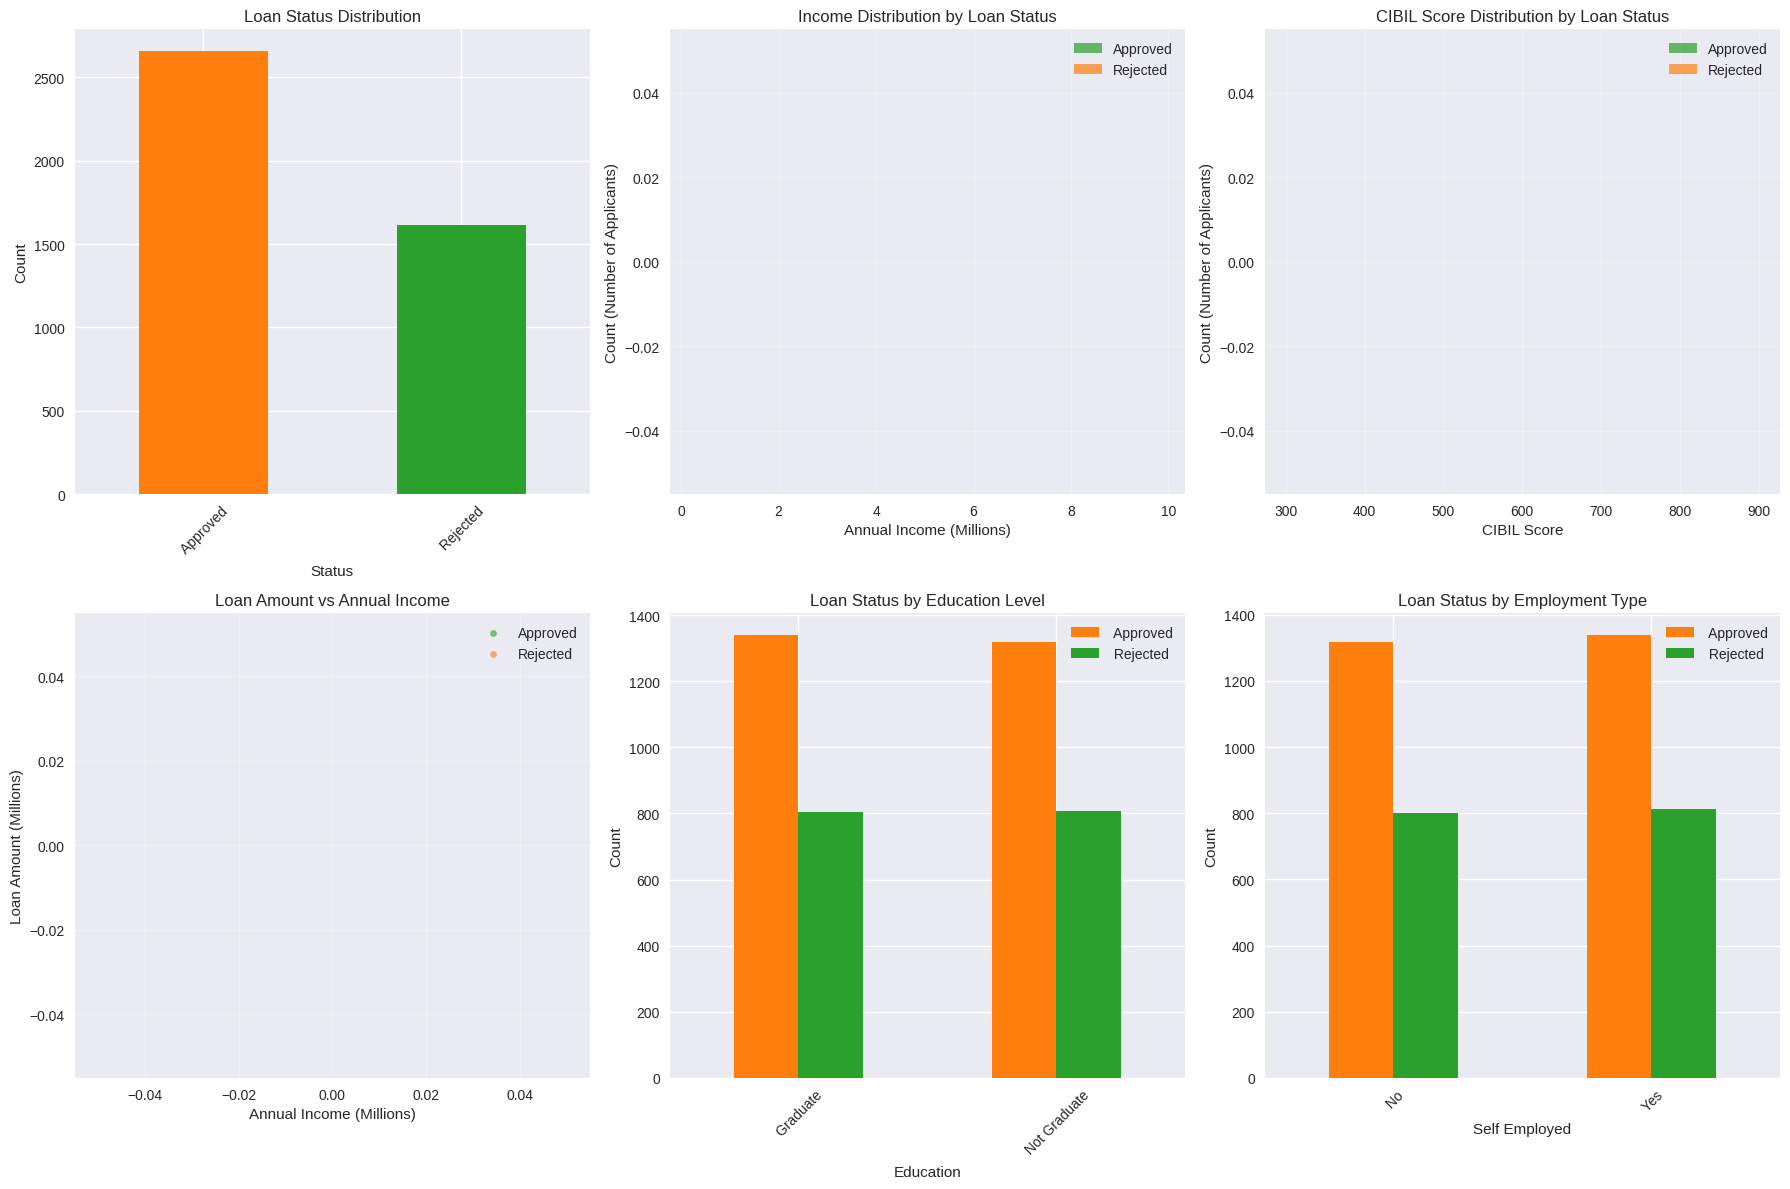

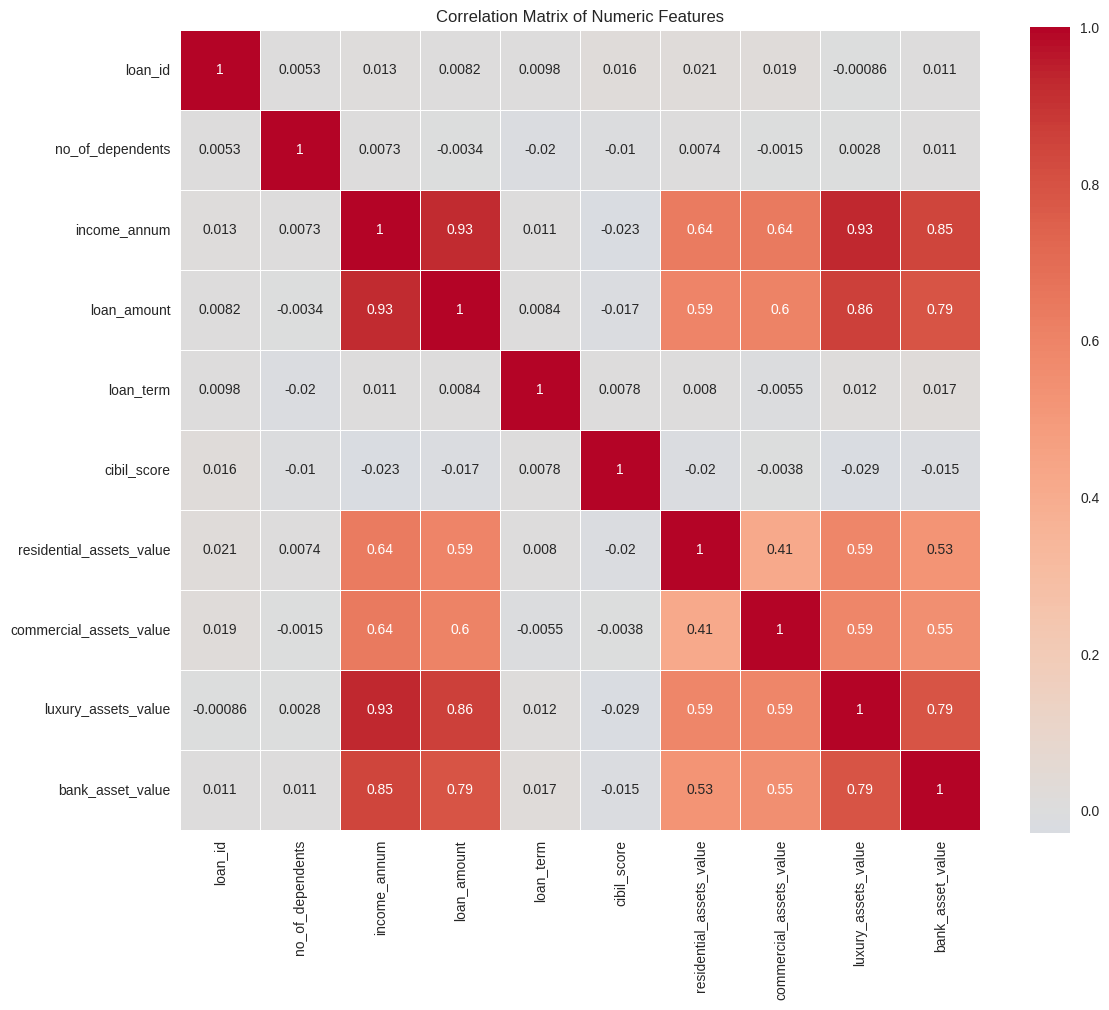


DATA PREPARATION
Categorical columns: ['education', 'self_employed']
Numerical columns: ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
Training set size: 3415
Test set size: 854
Training set approval rate: 37.77%
Test set approval rate: 37.82%

MODEL TRAINING
Training Logistic Regression...
Logistic Regression CV F1 Score: 0.8830 (+/- 0.0256)
Training Random Forest...
Random Forest CV F1 Score: 0.9758 (+/- 0.0105)
Training Gradient Boosting...
Gradient Boosting CV F1 Score: 0.9739 (+/- 0.0065)
Training AdaBoost...
AdaBoost CV F1 Score: 0.9587 (+/- 0.0172)
Training SVM...


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, f1_score, roc_curve, precision_recall_curve
from sklearn.inspection import permutation_importance

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

class LoanApprovalFairnessAnalyzer:
    def __init__(self, data_path):
        self.data_path = data_path
        self.data = None
        self.X = None
        self.y = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.models = {}
        self.predictions = {}
        self.fairness_metrics = {}

    def load_and_explore_data(self):
        """Load and perform initial exploration of the dataset"""
        print("="*60)
        print("LOAN APPROVAL PREDICTION WITH FAIRNESS ANALYSIS")
        print("="*60)

        # Load data
        self.data = pd.read_csv(self.data_path)

        # Clean column names (remove leading/trailing spaces)
        self.data.columns = self.data.columns.str.strip()

        print(f"\nDataset Shape: {self.data.shape}")
        print(f"Columns: {list(self.data.columns)}")

        # Display basic info
        print("\n" + "="*40)
        print("DATA OVERVIEW")
        print("="*40)
        print(self.data.head())
        print(f"\nMissing Values:\n{self.data.isnull().sum()}")
        print(f"\nData Types:\n{self.data.dtypes}")

        # Target distribution
        if 'loan_status' in self.data.columns:
            print(f"\nLoan Status Distribution:\n{self.data['loan_status'].value_counts()}")
            print(f"Approval Rate: {(self.data['loan_status'] == 'Approved').mean():.2%}")

        return self.data

    def visualize_data_distribution(self):
        """Create visualizations for data distribution and relationships"""
        print("\n" + "="*40)
        print("DATA VISUALIZATION")
        print("="*40)

        # Create subplots
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))

        # Loan status distribution
        self.data['loan_status'].value_counts().plot(kind='bar', ax=axes[0,0], color=['#ff7f0e', '#2ca02c'])
        axes[0,0].set_title('Loan Status Distribution')
        axes[0,0].set_xlabel('Status')
        axes[0,0].set_ylabel('Count')
        axes[0,0].tick_params(axis='x', rotation=45)


        # Income distribution by loan status
        approved = self.data[self.data['loan_status'] == 'Approved']['income_annum']
        rejected = self.data[self.data['loan_status'] == 'Rejected']['income_annum']

        # Use better bin calculation and convert to millions for readability
        income_bins = np.linspace(min(self.data['income_annum']), max(self.data['income_annum']), 25)
        axes[0,1].hist([approved/1e6, rejected/1e6], bins=income_bins/1e6, alpha=0.7,
                      label=['Approved', 'Rejected'], color=['#2ca02c', '#ff7f0e'])
        axes[0,1].set_title('Income Distribution by Loan Status')
        axes[0,1].set_xlabel('Annual Income (Millions)')
        axes[0,1].set_ylabel('Count (Number of Applicants)')
        axes[0,1].legend()
        axes[0,1].grid(True, alpha=0.3)

        # CIBIL Score distribution
        approved_cibil = self.data[self.data['loan_status'] == 'Approved']['cibil_score']
        rejected_cibil = self.data[self.data['loan_status'] == 'Rejected']['cibil_score']

        cibil_bins = np.linspace(min(self.data['cibil_score']), max(self.data['cibil_score']), 25)
        axes[0,2].hist([approved_cibil, rejected_cibil], bins=cibil_bins, alpha=0.7,
                      label=['Approved', 'Rejected'], color=['#2ca02c', '#ff7f0e'])
        axes[0,2].set_title('CIBIL Score Distribution by Loan Status')
        axes[0,2].set_xlabel('CIBIL Score')
        axes[0,2].set_ylabel('Count (Number of Applicants)')
        axes[0,2].legend()
        axes[0,2].grid(True, alpha=0.3)

        # Loan amount vs Income scatter plot
        approved_data = self.data[self.data['loan_status'] == 'Approved']
        rejected_data = self.data[self.data['loan_status'] == 'Rejected']

        # Convert to millions for better readability
        axes[1,0].scatter(approved_data['income_annum']/1e6, approved_data['loan_amount']/1e6,
                         alpha=0.6, label='Approved', color='#2ca02c', s=20)
        axes[1,0].scatter(rejected_data['income_annum']/1e6, rejected_data['loan_amount']/1e6,
                         alpha=0.6, label='Rejected', color='#ff7f0e', s=20)
        axes[1,0].set_title('Loan Amount vs Annual Income')
        axes[1,0].set_xlabel('Annual Income (Millions)')
        axes[1,0].set_ylabel('Loan Amount (Millions)')
        axes[1,0].legend()
        axes[1,0].grid(True, alpha=0.3)

        # Add trend line
        x_approved = approved_data['income_annum']/1e6
        y_approved = approved_data['loan_amount']/1e6
        if len(x_approved) > 1:
            z_approved = np.polyfit(x_approved, y_approved, 1)
            p_approved = np.poly1d(z_approved)
            axes[1,0].plot(sorted(x_approved), p_approved(sorted(x_approved)),
                          color='#2ca02c', linestyle='--', alpha=0.8, linewidth=2)

        # Education level distribution
        education_status = pd.crosstab(self.data['education'], self.data['loan_status'])
        education_status.plot(kind='bar', ax=axes[1,1], color=['#ff7f0e', '#2ca02c'])
        axes[1,1].set_title('Loan Status by Education Level')
        axes[1,1].set_xlabel('Education')
        axes[1,1].set_ylabel('Count')
        axes[1,1].tick_params(axis='x', rotation=45)
        axes[1,1].legend()

        # Self-employment status
        employment_status = pd.crosstab(self.data['self_employed'], self.data['loan_status'])
        employment_status.plot(kind='bar', ax=axes[1,2], color=['#ff7f0e', '#2ca02c'])
        axes[1,2].set_title('Loan Status by Employment Type')
        axes[1,2].set_xlabel('Self Employed')
        axes[1,2].set_ylabel('Count')
        axes[1,2].tick_params(axis='x', rotation=45)
        axes[1,2].legend()

        plt.tight_layout()
        plt.show()

        # Correlation heatmap
        plt.figure(figsize=(12, 10))
        numeric_cols = self.data.select_dtypes(include=[np.number]).columns
        correlation_matrix = self.data[numeric_cols].corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                   square=True, linewidths=0.5)
        plt.title('Correlation Matrix of Numeric Features')
        plt.tight_layout()
        plt.show()

    def prepare_data(self):
        """Prepare data for modeling"""
        print("\n" + "="*40)
        print("DATA PREPARATION")
        print("="*40)

        # Encode target variable
        label_encoder = LabelEncoder()
        self.data['loan_status_encoded'] = label_encoder.fit_transform(self.data['loan_status'])

        # Separate features and target
        self.X = self.data.drop(['loan_status', 'loan_status_encoded', 'loan_id'], axis=1)
        self.y = self.data['loan_status_encoded']

        # Identify categorical and numerical columns
        self.categorical_cols = self.X.select_dtypes(include=['object']).columns.tolist()
        self.numerical_cols = self.X.select_dtypes(include=[np.number]).columns.tolist()

        print(f"Categorical columns: {self.categorical_cols}")
        print(f"Numerical columns: {self.numerical_cols}")

        # Create preprocessing pipelines
        self.numerical_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ])

        self.categorical_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
        ])

        self.preprocessor = ColumnTransformer(
            transformers=[
                ('num', self.numerical_transformer, self.numerical_cols),
                ('cat', self.categorical_transformer, self.categorical_cols)
            ])

        # Train-test split
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=0.2, random_state=42, stratify=self.y
        )

        print(f"Training set size: {self.X_train.shape[0]}")
        print(f"Test set size: {self.X_test.shape[0]}")
        print(f"Training set approval rate: {self.y_train.mean():.2%}")
        print(f"Test set approval rate: {self.y_test.mean():.2%}")

    def train_models(self):
        """Train multiple advanced models"""
        print("\n" + "="*40)
        print("MODEL TRAINING")
        print("="*40)

        # Define models
        models_config = {
            'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
            'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
            'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100),
            'AdaBoost': AdaBoostClassifier(random_state=42, n_estimators=100),
            'SVM': SVC(random_state=42, probability=True)
        }

        # Train models
        for name, model in models_config.items():
            print(f"Training {name}...")

            # Create pipeline
            pipeline = Pipeline(steps=[
                ('preprocessor', self.preprocessor),
                ('classifier', model)
            ])

            # Fit model
            pipeline.fit(self.X_train, self.y_train)

            # Store model and predictions
            self.models[name] = pipeline
            self.predictions[name] = pipeline.predict(self.X_test)

            # Cross-validation score
            cv_scores = cross_val_score(pipeline, self.X_train, self.y_train, cv=5, scoring='f1')
            print(f"{name} CV F1 Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

    def train_smote_models(self):
        """Train models with SMOTE for handling class imbalance"""
        print("\n" + "="*40)
        print("SMOTE-ENHANCED MODEL TRAINING")
        print("="*40)

        # Define key models for SMOTE
        smote_models = {
            'RF + SMOTE': RandomForestClassifier(random_state=42, n_estimators=100),
            'GB + SMOTE': GradientBoostingClassifier(random_state=42, n_estimators=100)
        }

        for name, model in smote_models.items():
            print(f"Training {name}...")

            # Create SMOTE pipeline
            smote_pipeline = ImbPipeline(steps=[
                ('preprocessor', self.preprocessor),
                ('smote', SMOTE(random_state=42)),
                ('classifier', model)
            ])

            # Fit model
            smote_pipeline.fit(self.X_train, self.y_train)

            # Store model and predictions
            self.models[name] = smote_pipeline
            self.predictions[name] = smote_pipeline.predict(self.X_test)

    def evaluate_models(self):
        """Comprehensive model evaluation"""
        print("\n" + "="*40)
        print("MODEL EVALUATION")
        print("="*40)

        results = []

        for name, predictions in self.predictions.items():
            # Calculate metrics
            accuracy = accuracy_score(self.y_test, predictions)
            f1 = f1_score(self.y_test, predictions)
            roc_auc = roc_auc_score(self.y_test, predictions)

            results.append({
                'Model': name,
                'Accuracy': accuracy,
                'F1 Score': f1,
                'ROC AUC': roc_auc
            })

            print(f"\n{name} Results:")
            print(f"Accuracy: {accuracy:.4f}")
            print(f"F1 Score: {f1:.4f}")
            print(f"ROC AUC: {roc_auc:.4f}")
            print("\nClassification Report:")
            print(classification_report(self.y_test, predictions))

        # Create results DataFrame
        results_df = pd.DataFrame(results)
        print(f"\n{'='*60}")
        print("MODEL COMPARISON SUMMARY")
        print("="*60)
        print(results_df.to_string(index=False))

        # Find best model
        best_model_name = results_df.loc[results_df['F1 Score'].idxmax(), 'Model']
        print(f"\nBest Model (by F1 Score): {best_model_name}")

        return results_df, best_model_name

    def plot_model_comparison(self, results_df):
        """Plot model comparison"""
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))

        # Accuracy comparison
        bars1 = axes[0].bar(results_df['Model'], results_df['Accuracy'], color='skyblue')
        axes[0].set_title('Model Accuracy Comparison')
        axes[0].set_ylabel('Accuracy')
        axes[0].set_xticklabels(results_df['Model'], rotation=45, ha='right')
        axes[0].set_ylim(0, 1)

        # Add value labels on bars
        for bar in bars1:
            height = bar.get_height()
            axes[0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                        f'{height:.3f}', ha='center', va='bottom')

        # F1 Score comparison
        bars2 = axes[1].bar(results_df['Model'], results_df['F1 Score'], color='lightgreen')
        axes[1].set_title('Model F1 Score Comparison')
        axes[1].set_ylabel('F1 Score')
        axes[1].set_xticklabels(results_df['Model'], rotation=45, ha='right')
        axes[1].set_ylim(0, 1)

        for bar in bars2:
            height = bar.get_height()
            axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                        f'{height:.3f}', ha='center', va='bottom')

        # ROC AUC comparison
        bars3 = axes[2].bar(results_df['Model'], results_df['ROC AUC'], color='salmon')
        axes[2].set_title('Model ROC AUC Comparison')
        axes[2].set_ylabel('ROC AUC')
        axes[2].set_xticklabels(results_df['Model'], rotation=45, ha='right')
        axes[2].set_ylim(0, 1)

        for bar in bars3:
            height = bar.get_height()
            axes[2].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                        f'{height:.3f}', ha='center', va='bottom')

        plt.tight_layout()
        plt.show()

    def analyze_feature_importance(self, best_model_name):
        """Analyze feature importance for the best model"""
        print(f"\n{'='*40}")
        print(f"FEATURE IMPORTANCE ANALYSIS - {best_model_name}")
        print("="*40)

        best_model = self.models[best_model_name]

        # Get feature names after preprocessing
        if hasattr(best_model, 'named_steps'):
            preprocessor = best_model.named_steps['preprocessor']
        else:
            preprocessor = best_model.steps[0][1]

        # Fit preprocessor to get feature names
        preprocessor.fit(self.X_train)

        # Get feature names
        feature_names = self.numerical_cols.copy()
        if 'cat' in preprocessor.named_transformers_:
            cat_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(self.categorical_cols)
            feature_names.extend(cat_feature_names)

        # Get feature importance
        if hasattr(best_model, 'named_steps'):
            classifier = best_model.named_steps['classifier']
        else:
            classifier = best_model.steps[-1][1]

        if hasattr(classifier, 'feature_importances_'):
            importance_scores = classifier.feature_importances_

            # Create feature importance DataFrame
            feature_importance_df = pd.DataFrame({
                'Feature': feature_names,
                'Importance': importance_scores
            }).sort_values('Importance', ascending=False)

            print("Top 15 Most Important Features:")
            print(feature_importance_df.head(15).to_string(index=False))

            # Plot feature importance
            plt.figure(figsize=(12, 8))
            top_features = feature_importance_df.head(15)
            sns.barplot(data=top_features, x='Importance', y='Feature', palette='viridis')
            plt.title(f'Top 15 Feature Importance - {best_model_name}')
            plt.xlabel('Importance Score')
            plt.tight_layout()
            plt.show()

            return feature_importance_df
        else:
            print(f"Feature importance not available for {best_model_name}")
            return None

    def fairness_analysis(self, best_model_name):
        """Analyze fairness across different demographic groups"""
        print(f"\n{'='*60}")
        print("FAIRNESS ANALYSIS")
        print("="*60)

        # Get predictions from best model
        best_predictions = self.predictions[best_model_name]

        # Create test dataframe with predictions
        test_df = self.X_test.copy()
        test_df['actual'] = self.y_test
        test_df['predicted'] = best_predictions

        # Analyze fairness by education level
        if 'education' in test_df.columns:
            print("\nFAIRNESS BY EDUCATION LEVEL:")
            print("="*40)

            education_fairness = self.calculate_fairness_metrics(test_df, 'education')
            print(education_fairness)

            # Visualize education fairness
            self.plot_fairness_metrics(education_fairness, 'Education Level')

        # Analyze fairness by employment status
        if 'self_employed' in test_df.columns:
            print("\nFAIRNESS BY EMPLOYMENT STATUS:")
            print("="*40)

            employment_fairness = self.calculate_fairness_metrics(test_df, 'self_employed')
            print(employment_fairness)

            # Visualize employment fairness
            self.plot_fairness_metrics(employment_fairness, 'Employment Status')

        # Statistical significance tests
        self.statistical_fairness_tests(test_df)

    def calculate_fairness_metrics(self, df, group_col):
        """Calculate fairness metrics for a specific group"""
        fairness_metrics = []

        for group in df[group_col].unique():
            group_data = df[df[group_col] == group]

            # Calculate metrics
            total_count = len(group_data)
            actual_approval_rate = group_data['actual'].mean()
            predicted_approval_rate = group_data['predicted'].mean()

            # True Positive Rate (Sensitivity)
            tp = ((group_data['actual'] == 1) & (group_data['predicted'] == 1)).sum()
            fn = ((group_data['actual'] == 1) & (group_data['predicted'] == 0)).sum()
            tpr = tp / (tp + fn) if (tp + fn) > 0 else 0

            # False Positive Rate
            fp = ((group_data['actual'] == 0) & (group_data['predicted'] == 1)).sum()
            tn = ((group_data['actual'] == 0) & (group_data['predicted'] == 0)).sum()
            fpr = fp / (fp + tn) if (fp + tn) > 0 else 0

            # Precision
            precision = tp / (tp + fp) if (tp + fp) > 0 else 0

            # Accuracy
            accuracy = ((group_data['actual'] == group_data['predicted']).sum()) / total_count

            fairness_metrics.append({
                'Group': group,
                'Count': total_count,
                'Actual_Approval_Rate': actual_approval_rate,
                'Predicted_Approval_Rate': predicted_approval_rate,
                'TPR': tpr,
                'FPR': fpr,
                'Precision': precision,
                'Accuracy': accuracy
            })

        return pd.DataFrame(fairness_metrics)

    def plot_fairness_metrics(self, fairness_df, title):
        """Plot fairness metrics"""
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))

        # Approval rates
        x = range(len(fairness_df))
        width = 0.35

        axes[0,0].bar([i - width/2 for i in x], fairness_df['Actual_Approval_Rate'],
                     width, label='Actual', alpha=0.8)
        axes[0,0].bar([i + width/2 for i in x], fairness_df['Predicted_Approval_Rate'],
                     width, label='Predicted', alpha=0.8)
        axes[0,0].set_title(f'Approval Rates by {title}')
        axes[0,0].set_xlabel(title)
        axes[0,0].set_ylabel('Approval Rate')
        axes[0,0].set_xticks(x)
        axes[0,0].set_xticklabels(fairness_df['Group'])
        axes[0,0].legend()

        # True Positive Rate
        axes[0,1].bar(fairness_df['Group'], fairness_df['TPR'], color='green', alpha=0.7)
        axes[0,1].set_title(f'True Positive Rate by {title}')
        axes[0,1].set_xlabel(title)
        axes[0,1].set_ylabel('TPR')
        axes[0,1].tick_params(axis='x', rotation=45)

        # False Positive Rate
        axes[1,0].bar(fairness_df['Group'], fairness_df['FPR'], color='red', alpha=0.7)
        axes[1,0].set_title(f'False Positive Rate by {title}')
        axes[1,0].set_xlabel(title)
        axes[1,0].set_ylabel('FPR')
        axes[1,0].tick_params(axis='x', rotation=45)

        # Accuracy
        axes[1,1].bar(fairness_df['Group'], fairness_df['Accuracy'], color='blue', alpha=0.7)
        axes[1,1].set_title(f'Accuracy by {title}')
        axes[1,1].set_xlabel(title)
        axes[1,1].set_ylabel('Accuracy')
        axes[1,1].tick_params(axis='x', rotation=45)

        plt.tight_layout()
        plt.show()

    def statistical_fairness_tests(self, df):
        """Perform statistical tests for fairness"""
        print(f"\n{'='*40}")
        print("STATISTICAL FAIRNESS TESTS")
        print("="*40)

        # Test for education level
        if 'education' in df.columns:
            grad_predictions = df[df['education'] == 'Graduate']['predicted']
            not_grad_predictions = df[df['education'] == 'Not Graduate']['predicted']

            # Chi-square test
            from scipy.stats import chi2_contingency
            contingency_table = pd.crosstab(df['education'], df['predicted'])
            chi2, p_value, dof, expected = chi2_contingency(contingency_table)

            print(f"Education Level Fairness Test:")
            print(f"Chi-square statistic: {chi2:.4f}")
            print(f"P-value: {p_value:.4f}")
            print(f"Significant difference: {'Yes' if p_value < 0.05 else 'No'}")

            # Two-proportion z-test
            grad_approval_rate = grad_predictions.mean()
            not_grad_approval_rate = not_grad_predictions.mean()

            print(f"\nApproval Rates:")
            print(f"Graduate: {grad_approval_rate:.2%}")
            print(f"Not Graduate: {not_grad_approval_rate:.2%}")
            print(f"Difference: {abs(grad_approval_rate - not_grad_approval_rate):.2%}")

        # Test for employment status
        if 'self_employed' in df.columns:
            self_emp_predictions = df[df['self_employed'] == 'Yes']['predicted']
            not_self_emp_predictions = df[df['self_employed'] == 'No']['predicted']

            contingency_table = pd.crosstab(df['self_employed'], df['predicted'])
            chi2, p_value, dof, expected = chi2_contingency(contingency_table)

            print(f"\nEmployment Status Fairness Test:")
            print(f"Chi-square statistic: {chi2:.4f}")
            print(f"P-value: {p_value:.4f}")
            print(f"Significant difference: {'Yes' if p_value < 0.05 else 'No'}")

            self_emp_approval_rate = self_emp_predictions.mean()
            not_self_emp_approval_rate = not_self_emp_predictions.mean()

            print(f"\nApproval Rates:")
            print(f"Self-employed: {self_emp_approval_rate:.2%}")
            print(f"Not Self-employed: {not_self_emp_approval_rate:.2%}")
            print(f"Difference: {abs(self_emp_approval_rate - not_self_emp_approval_rate):.2%}")

    def run_complete_analysis(self):
        """Run the complete analysis pipeline"""
        # Load and explore data
        self.load_and_explore_data()

        # Visualize data
        self.visualize_data_distribution()

        # Prepare data
        self.prepare_data()

        # Train models
        self.train_models()
        self.train_smote_models()

        # Evaluate models
        results_df, best_model_name = self.evaluate_models()

        # Plot model comparison
        self.plot_model_comparison(results_df)

        # Analyze feature importance
        self.analyze_feature_importance(best_model_name)

        # Fairness analysis
        self.fairness_analysis(best_model_name)

        print(f"\n{'='*60}")
        print("ANALYSIS COMPLETE")
        print("="*60)
        print(f"Best performing model: {best_model_name}")
        print("Please review the fairness analysis results above.")
        print("Consider implementing bias mitigation techniques if unfair patterns are detected.")

# Usage
if __name__ == "__main__":
    # Initialize analyzer
    analyzer = LoanApprovalFairnessAnalyzer('/content/loan_approval_dataset.csv')

    # Run complete analysis
    analyzer.run_complete_analysis()